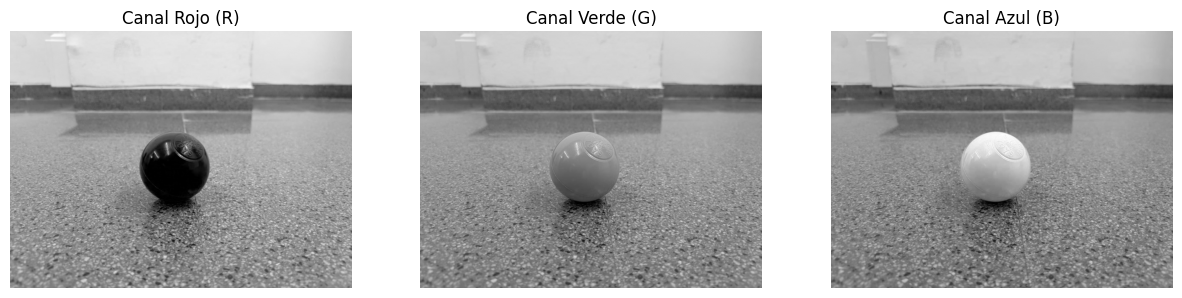

In [4]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
img_path = "/Users/bylookie/Desktop/RA-practicafinal/anais/visio/ex1.jpeg"

# Cargar la imagen (en BGR por defecto)
img = cv2.imread(img_path)

if img is None:
    print("No se pudo cargar la imagen. Revisa la ruta.")
else:
    # Separar los canales
    b, g, r = cv2.split(img)

    # Mostrar los canales individualmente
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(r, cmap='gray')
    axs[0].set_title("Canal Rojo (R)")
    axs[0].axis('off')

    axs[1].imshow(g, cmap='gray')
    axs[1].set_title("Canal Verde (G)")
    axs[1].axis('off')

    axs[2].imshow(b, cmap='gray')
    axs[2].set_title("Canal Azul (B)")
    axs[2].axis('off')

    plt.show()


In [12]:
IMG_PATH = "/Users/bylookie/Desktop/RA-practicafinal/anais/visio/ex1.jpeg"

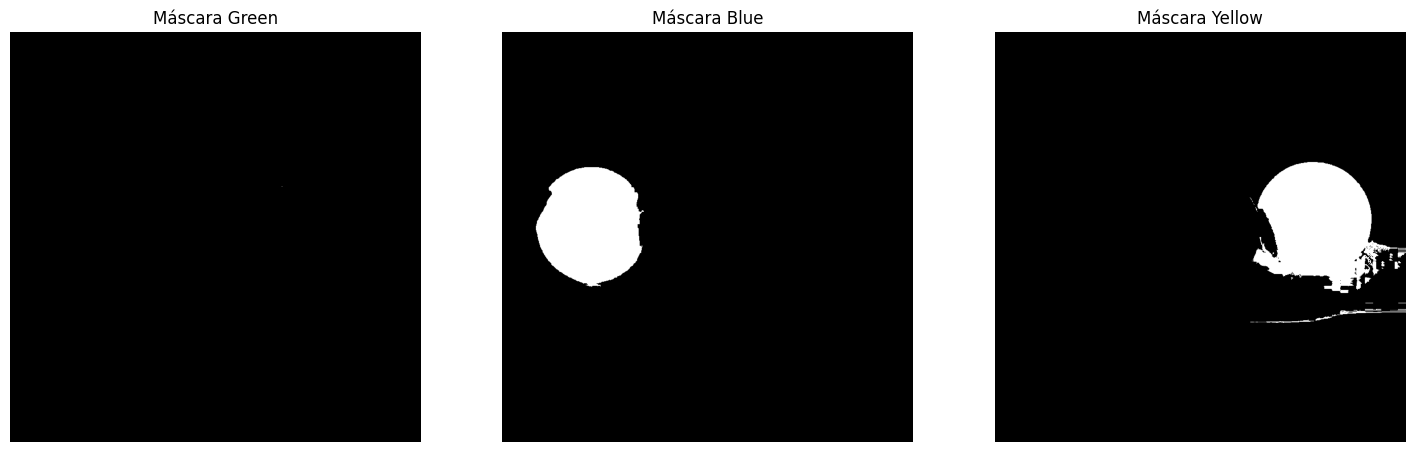

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_color_mask_hsv(img, color):
    """
    Devuelve la máscara binaria del color seleccionado usando HSV.
    img: imagen BGR.
    color: 'green', 'blue', o 'yellow'
    Rangos abiertos para asegurar robustez.
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if color == 'green':
        lower = np.array([30, 40, 40])
        upper = np.array([90, 255, 255])
    elif color == 'blue':
        lower = np.array([85, 40, 40])
        upper = np.array([140, 255, 255])
    elif color == 'yellow':
        lower = np.array([15, 40, 40])
        upper = np.array([45, 255, 255])
    else:
        raise ValueError("Color no soportado: usa 'green', 'blue' o 'yellow'.")

    mask = cv2.inRange(hsv, lower, upper)
    return mask

# Cargar la imagen
img = cv2.imread(IMG_PATH)

if img is None:
    print("No se pudo cargar la imagen.")
else:
    colors = ['green', 'blue', 'yellow']
    masks = [get_color_mask_hsv(img, color) for color in colors]

    # Mostrar resultados
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    for i, (mask, color) in enumerate(zip(masks, colors)):
        axs[i].imshow(mask, cmap='gray')
        axs[i].set_title(f"Máscara {color.capitalize()}")
        axs[i].axis('off')
    plt.show()


In [9]:
def detectar_circulos(mask, dp=1.2, min_dist=30, param1=100, param2=40, min_radius=10, max_radius=60):
    """
    Aplica la transformada de Hough para detectar círculos en una máscara binaria.
    Devuelve una lista de círculos: (x, y, radio)
    """
    # Suavizado para mejorar la detección
    blurred = cv2.GaussianBlur(mask, (9, 9), 2)
    # Detección de círculos
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        return circles  # (x, y, r)
    else:
        return []


No se detectaron círculos en la máscara green.
No se detectaron círculos en la máscara blue.
No se detectaron círculos en la máscara yellow.


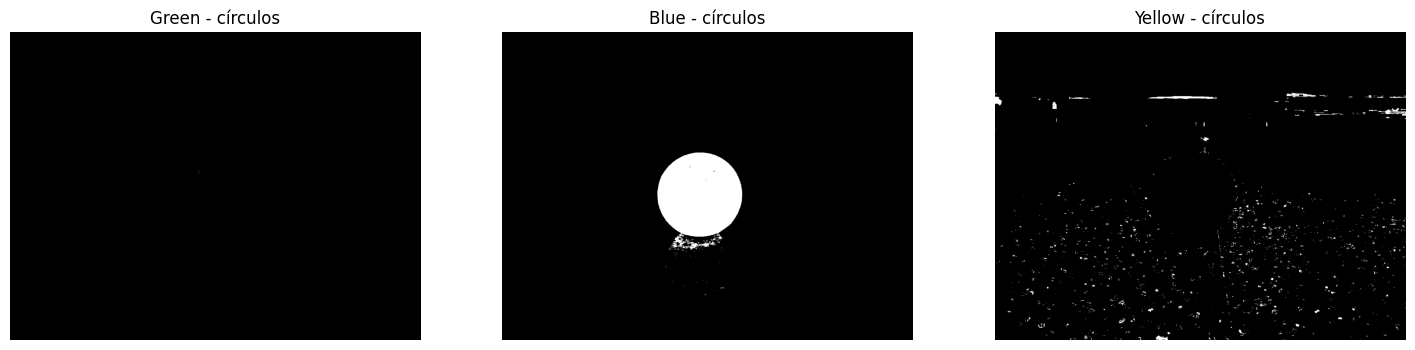

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asume que tienes las funciones get_color_mask_hsv y detectar_circulos ya definidas

img = cv2.imread(IMG_PATH)

if img is None:
    print("No se pudo cargar la imagen.")
else:
    colors = ['green', 'blue', 'yellow']
    masks = [get_color_mask_hsv(img, color) for color in colors]

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, (mask, color) in enumerate(zip(masks, colors)):
        # Detección de círculos
        circulos = detectar_circulos(
            mask,
            dp=1.2,
            min_dist=40,
            param1=100,
            param2=40,  # Puedes subir a 50 si hay falsos positivos
            min_radius=10,
            max_radius=60
        )
        # Convertir la máscara a color para dibujar círculos en rojo
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        # Dibujar círculos
        if len(circulos) > 0:
            for (x, y, r) in circulos:
                cv2.circle(mask_color, (x, y), r, (0, 0, 255), 2)
                cv2.circle(mask_color, (x, y), 2, (0, 255, 0), 3)  # centro
        else:
            print(f"No se detectaron círculos en la máscara {color}.")
        axs[i].imshow(mask_color)
        axs[i].set_title(f"{color.capitalize()} - círculos")
        axs[i].axis('off')

    plt.show()


In [20]:
IMG_PATH = "/Users/bylookie/Desktop/RA-practicafinal/anais/visio/ex1.jpeg"

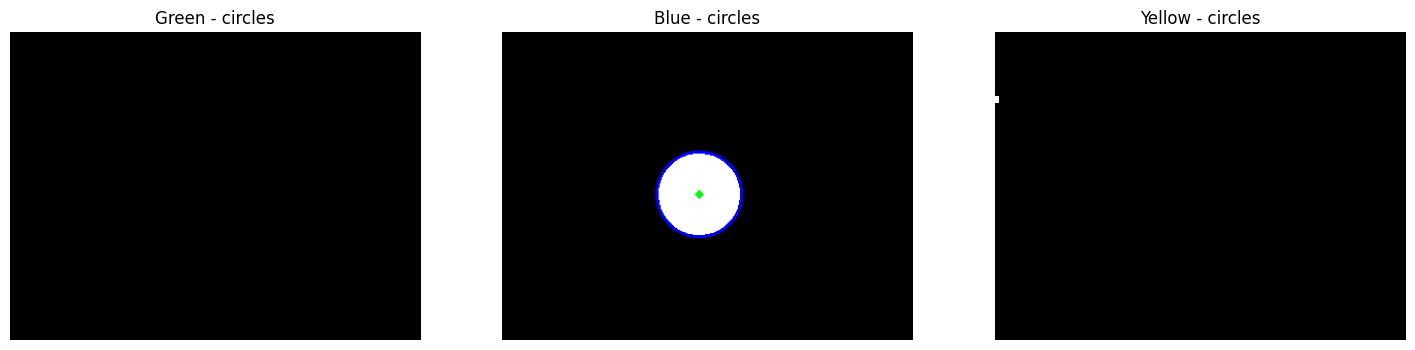

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image_by_height(img, target_height=300):
    """Resize image maintaining aspect ratio given a target height."""
    h, w = img.shape[:2]
    scale_factor = target_height / h
    new_width = int(w * scale_factor)
    resized_img = cv2.resize(img, (new_width, target_height))
    return resized_img, scale_factor

def get_hsv_mask(img, color):
    """Get a color mask from a BGR image using HSV color space."""
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if color == 'green':
        lower = np.array([30, 40, 40])
        upper = np.array([90, 255, 255])
    elif color == 'blue':
        lower = np.array([85, 40, 40])
        upper = np.array([140, 255, 255])
    elif color == 'yellow':
        lower = np.array([15, 40, 40])
        upper = np.array([45, 255, 255])
    else:
        raise ValueError("Color must be 'green', 'blue', or 'yellow'.")
    mask = cv2.inRange(hsv, lower, upper)
    # Morphological cleaning
    kernel = np.ones((7, 7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask

def detect_circles(mask, dp=1.2, min_dist=50, param1=70, param2=20, min_radius=10, max_radius=120):
    """Detect circles using Hough Transform in a binary mask."""
    blur = cv2.GaussianBlur(mask, (9, 9), 2)
    circles = cv2.HoughCircles(
        blur,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        return circles  # List of (x, y, r)
    else:
        return []

# Load and resize image
img = cv2.imread(IMG_PATH)
if img is None:
    print("Image could not be loaded.")
else:
    resized_img, scale_factor = resize_image_by_height(img, target_height=300)
    colors = ['green', 'blue', 'yellow']
    masks = [get_hsv_mask(resized_img, color) for color in colors]

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    for i, (mask, color) in enumerate(zip(masks, colors)):
        circles = detect_circles(
            mask,
            dp=1.2,
            min_dist=40,
            param1=70,
            param2=20,
            min_radius=10,
            max_radius=120
        )
        # Draw detected circles on mask (for debugging)
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        if len(circles) > 0:
            for (x, y, r) in circles:
                cv2.circle(mask_color, (x, y), r, (0, 0, 255), 2)
                cv2.circle(mask_color, (x, y), 2, (0, 255, 0), 3)
        axs[i].imshow(mask_color)
        axs[i].set_title(f"{color.capitalize()} - circles")
        axs[i].axis('off')
    plt.show()
